In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vader-sentiment/vader_lexicon.txt
/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv
/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv


In [2]:
biden = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv', lineterminator='\n', 
                    parse_dates=True)
trump = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv', lineterminator='\n', 
                    parse_dates=True)

In [3]:
#vader sentimenal analysis
vader = pd.read_csv('/kaggle/input/vader-sentiment/vader_lexicon.txt', sep = '\t', index_col = 0, 
                   header = None).drop([2,3], axis = 1).rename(columns={1: 'polarity'})

#Get rid of all punctutations
punct_re = r'[^(\w)(\s)]'
biden['no_punc'] = biden['tweet'].str.lower().replace(punct_re, ' ', regex = True) 

#Make new dataframe
tidy_format = pd.DataFrame(biden['no_punc'].str.split(expand = True).stack()).reset_index(level = 1).rename(columns = {'level_1' : 'num', 0 : 'word'})

tidy_format2 = tidy_format
tidy_format2['index'] = tidy_format.index

#make polarity column
biden['polarity_vader'] = tidy_format2.merge(vader, how = 'left', left_on = 'word', right_on = 0).fillna(0).groupby('index').sum()['polarity']

In [8]:
#get rid of tweets with polarity score of 0
biden = biden[biden['polarity_vader'] != 0.0]
biden = biden.reset_index()
biden.head()

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,lat,long,city,country,continent,state,state_code,collected_at,no_punc,polarity_vader
0,3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849,chrislongview watching and setting dvr let s...,2.5
1,5,2020-10-15 00:00:23,1.316529e+18,"""IS THIS WRONG??!!"" Cory Booker's BRILLIANT Fi...",0.0,0.0,Twitter Web App,3.057279e+08,Dose of Dissonance,Dose_Dissonance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:02.589136415,is this wrong cory booker s brilliant fi...,0.3
2,6,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,...,41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:03.106963698,in 2020 nypost is being censorship censore...,-0.4
3,7,2020-10-15 00:00:31,1.316529e+18,►► Tell Politicians to STICK IT with this FREE...,0.0,0.0,Freebie-Depot,1.030832e+08,🆓 Freebie Depot,FreebieDepot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:03.624790981,tell politicians to stick it with this free...,2.3
4,9,2020-10-15 00:00:41,1.316529e+18,Proof Bidens are crooked. Twitter will suspen...,1.0,1.0,Twitter for Android,1.275659e+18,Jake Rivendale,JakeRivendale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:04.660445547,proof bidens are crooked twitter will suspen...,0.5


In [10]:
#1 if polarity score is greater than 0 which means the tweet supports biden
#0 if polarity score is less than 0 which means the tweet supports trump
for_biden = []

for polarity in biden['polarity_vader']:
    if polarity > 0:
        for_biden.append(1)
    else:
        for_biden.append(0)

In [12]:
biden['biden_or_trump'] = for_biden
biden.head()

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,long,city,country,continent,state,state_code,collected_at,no_punc,polarity_vader,biden_or_trump
0,3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849,chrislongview watching and setting dvr let s...,2.5,1
1,5,2020-10-15 00:00:23,1.316529e+18,"""IS THIS WRONG??!!"" Cory Booker's BRILLIANT Fi...",0.0,0.0,Twitter Web App,3.057279e+08,Dose of Dissonance,Dose_Dissonance,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:02.589136415,is this wrong cory booker s brilliant fi...,0.3,1
2,6,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,...,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:03.106963698,in 2020 nypost is being censorship censore...,-0.4,0
3,7,2020-10-15 00:00:31,1.316529e+18,►► Tell Politicians to STICK IT with this FREE...,0.0,0.0,Freebie-Depot,1.030832e+08,🆓 Freebie Depot,FreebieDepot,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:03.624790981,tell politicians to stick it with this free...,2.3,1
4,9,2020-10-15 00:00:41,1.316529e+18,Proof Bidens are crooked. Twitter will suspen...,1.0,1.0,Twitter for Android,1.275659e+18,Jake Rivendale,JakeRivendale,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:04.660445547,proof bidens are crooked twitter will suspen...,0.5,1


In [13]:
#vader sentimenal analysis
vader = pd.read_csv('/kaggle/input/vader-sentiment/vader_lexicon.txt', sep = '\t', index_col = 0, 
                   header = None).drop([2,3], axis = 1).rename(columns={1: 'polarity'})

#Get rid of all punctutations
punct_re = r'[^(\w)(\s)]'
trump['no_punc'] = trump['tweet'].str.lower().replace(punct_re, ' ', regex = True) 

#Make new dataframe
tidy_format = pd.DataFrame(trump['no_punc'].str.split(expand = True).stack()).reset_index(level = 1).rename(columns = {'level_1' : 'num', 0 : 'word'})

tidy_format2 = tidy_format
tidy_format2['index'] = tidy_format.index

#make polarity column
trump['polarity_vader'] = tidy_format2.merge(vader, how = 'left', left_on = 'word', right_on = 0).fillna(0).groupby('index').sum()['polarity']

In [16]:
trump = trump[trump['polarity_vader'] != 0.0]
trump = trump.reset_index()
trump.head()

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,lat,long,city,country,continent,state,state_code,collected_at,no_punc,polarity_vader
0,2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,...,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump as a student i used to hear for years ...,1.5
1,5,2020-10-15 00:00:17,1.316529e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,...,33.782519,-117.228648,NaN,United States of America,North America,California,CA,2020-10-21 00:00:01.866082651,clady62 her 15 minutes were over long time ag...,-1.6
2,6,2020-10-15 00:00:17,1.316529e+18,@richardmarx Glad u got out of the house! DICK...,0.0,0.0,Twitter for iPhone,7.674018e+17,Michael Wilson,wilsonfire9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:02.239299182,richardmarx glad u got out of the house dick...,-0.3
3,7,2020-10-15 00:00:18,1.316529e+18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,Twitter for iPhone,9.007611e+17,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,sm_gulledge,...,40.225357,-82.688140,NaN,United States of America,North America,Ohio,OH,2020-10-21 00:00:02.612515712,deeviousdenise realdonaldtrump nypost there...,2.0
4,8,2020-10-15 00:00:20,1.316529e+18,One of the single most effective remedies to e...,0.0,0.0,Twitter Web App,5.404769e+08,Jamieo,jamieo33,...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:00:02.985732243,one of the single most effective remedies to e...,2.1


In [18]:
#0 if polarity is greater than 0, tweet supports trump which is consistent with earlier
#1 if polarity is less than 0, tweet does not support trump 

for_trump = []

for polarity in trump['polarity_vader']:
    if polarity > 0:
        for_trump.append(0)
    else:
        for_trump.append(1)

In [19]:
trump['biden_or_trump'] = for_trump
trump.head()

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,long,city,country,continent,state,state_code,collected_at,no_punc,polarity_vader,biden_or_trump
0,2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,...,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump as a student i used to hear for years ...,1.5,0
1,5,2020-10-15 00:00:17,1.316529e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,...,-117.228648,NaN,United States of America,North America,California,CA,2020-10-21 00:00:01.866082651,clady62 her 15 minutes were over long time ag...,-1.6,1
2,6,2020-10-15 00:00:17,1.316529e+18,@richardmarx Glad u got out of the house! DICK...,0.0,0.0,Twitter for iPhone,7.674018e+17,Michael Wilson,wilsonfire9,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:02.239299182,richardmarx glad u got out of the house dick...,-0.3,1
3,7,2020-10-15 00:00:18,1.316529e+18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,Twitter for iPhone,9.007611e+17,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,sm_gulledge,...,-82.688140,NaN,United States of America,North America,Ohio,OH,2020-10-21 00:00:02.612515712,deeviousdenise realdonaldtrump nypost there...,2.0,0
4,8,2020-10-15 00:00:20,1.316529e+18,One of the single most effective remedies to e...,0.0,0.0,Twitter Web App,5.404769e+08,Jamieo,jamieo33,...,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:00:02.985732243,one of the single most effective remedies to e...,2.1,0


In [20]:
biden_and_trump = biden.append(trump, ignore_index = True)
biden_and_trump.shape

(1040283, 25)

In [23]:
#extract all hashtags from every single tweet and place it into all_hashtags
import re

hashtag = r'#[a-zA-Z]{1,}'

all_hashtags = []
for tweet in biden_and_trump['tweet']:
    array_hash = re.findall(hashtag, tweet)
    for elem in array_hash:
        all_hashtags.append(elem)

In [24]:
#create a map where the key is the hashtag and the value is the number of occurrences for that hashtag
from collections import Counter

counter_hash = Counter(all_hashtags)

In [25]:
most_common = sorted(counter_hash.items(), key = lambda x: x[1], reverse = True)
most_common

[('#Trump', 566394),
 ('#Biden', 343084),
 ('#JoeBiden', 185673),
 ('#trump', 114927),
 ('#Election', 105105),
 ('#DonaldTrump', 83563),
 ('#BidenHarris', 66844),
 ('#biden', 52533),
 ('#Elections', 47214),
 ('#MAGA', 34424),
 ('#COVID', 32709),
 ('#ElectionDay', 32015),
 ('#USElection', 28560),
 ('#USA', 27224),
 ('#TRUMP', 24662),
 ('#KamalaHarris', 23304),
 ('#Vote', 20517),
 ('#election', 19595),
 ('#vote', 19328),
 ('#ElectionResults', 17985),
 ('#America', 16858),
 ('#ElectionNight', 16847),
 ('#joebiden', 16243),
 ('#VOTE', 15989),
 ('#Debates', 15649),
 ('#USElections', 15458),
 ('#TrumpMeltdown', 13956),
 ('#GOP', 13490),
 ('#Democrats', 13212),
 ('#USAElections', 13176),
 ('#bidenharis', 12270),
 ('#VoteHimOut', 10956),
 ('#Pennsylvania', 10948),
 ('#elections', 10456),
 ('#USElectionResults', 10317),
 ('#USAelection', 9877),
 ('#POTUS', 9700),
 ('#Elecciones', 9619),
 ('#donaldtrump', 9617),
 ('#Covid', 9485),
 ('#PresidentialDebate', 9250),
 ('#TrumpvsBiden', 8968),
 ('#cor

In [26]:
#get all hashtags into and array
keys_hash = np.array([*counter_hash.keys()])

#put all hashtags into a single text to use for wordcloud
text_hash = ''
for elem in keys_hash:
    text_hash += ' '
    text_hash += elem

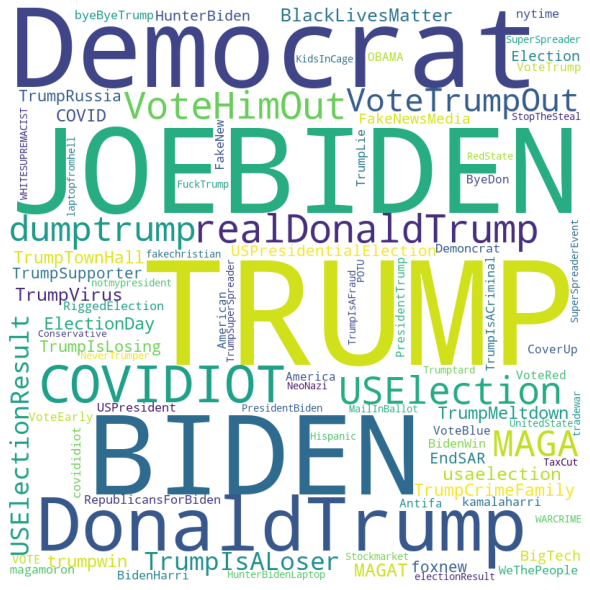

In [27]:
#create a wordcloud to see how frequent each hashtag appears
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                     min_font_size = 10).generate(text_hash)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [28]:
biden_and_trump.head()

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,long,city,country,continent,state,state_code,collected_at,no_punc,polarity_vader,biden_or_trump
0,3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849,chrislongview watching and setting dvr let s...,2.5,1
1,5,2020-10-15 00:00:23,1.316529e+18,"""IS THIS WRONG??!!"" Cory Booker's BRILLIANT Fi...",0.0,0.0,Twitter Web App,3.057279e+08,Dose of Dissonance,Dose_Dissonance,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:02.589136415,is this wrong cory booker s brilliant fi...,0.3,1
2,6,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,...,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:03.106963698,in 2020 nypost is being censorship censore...,-0.4,0
3,7,2020-10-15 00:00:31,1.316529e+18,►► Tell Politicians to STICK IT with this FREE...,0.0,0.0,Freebie-Depot,1.030832e+08,🆓 Freebie Depot,FreebieDepot,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:03.624790981,tell politicians to stick it with this free...,2.3,1
4,9,2020-10-15 00:00:41,1.316529e+18,Proof Bidens are crooked. Twitter will suspen...,1.0,1.0,Twitter for Android,1.275659e+18,Jake Rivendale,JakeRivendale,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:04.660445547,proof bidens are crooked twitter will suspen...,0.5,1


In [30]:
#get all swing states here
test = biden_and_trump.copy()
test = test[(test['state'] == 'Michigan') | (test['state'] == 'Pennsylvania') | (test['state'] == 'Wisonsin')]
test.head()

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,long,city,country,continent,state,state_code,collected_at,no_punc,polarity_vader,biden_or_trump
86,139,2020-10-15 00:09:09,1.316532e+18,The 6 most misleading claims from #JoeBiden: ...,0.0,0.0,Twitter Web App,4.095715e+08,Howard Wachtel,mindovermath,...,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 00:01:14.049301472,the 6 most misleading claims from joebiden ...,-1.7,0
184,294,2020-10-15 00:17:46,1.316534e+18,Disqualified. Withdrawal from the race. #JoeBi...,1.0,0.0,Twitter for iPhone,4.122967e+08,TheRealJoeBedridden,Immortal_J,...,-79.923952,Pittsburgh,United States of America,North America,Pennsylvania,PA,2020-10-21 00:02:36.383839473,disqualified withdrawal from the race joebi...,-1.7,0
199,317,2020-10-15 00:19:05,1.316534e+18,#JoeBiden's homes. The sacrifices of Public Se...,1.0,2.0,Twitter for Android,9.002876e+07,Vladz Hammer 🏆 🇺🇸,Vladzhammer,...,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:02:48.293866983,joebiden s homes the sacrifices of public se...,-1.5,0
256,404,2020-10-15 00:24:00,1.316535e+18,Joe Biden Has No Idea How Long Trump Has Been ...,0.0,0.0,Twitter Web App,2.475479e+08,Gil Clark,TheRealGilClark,...,-75.662129,Scranton,United States of America,North America,Pennsylvania,PA,2020-10-21 00:03:34.380495172,joe biden has no idea how long trump has been ...,-1.2,0
280,435,2020-10-15 00:25:53,1.316536e+18,@business Toomey already announced he is not r...,2.0,1.0,Twitter for iPad,1.009115e+18,Daddy Bitts,BittsDaddy,...,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 00:03:50.433140946,business toomey already announced he is not r...,-0.4,0


In [31]:
test.shape

(13352, 25)

In [36]:
train = biden_and_trump.copy()
train = train[(train['state'] != 'Michigan') & (train['state'] != 'Pennsylvania') & (train['state'] != 'Wisonsin')]
train.head()

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,long,city,country,continent,state,state_code,collected_at,no_punc,polarity_vader,biden_or_trump
0,3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849,chrislongview watching and setting dvr let s...,2.5,1
1,5,2020-10-15 00:00:23,1.316529e+18,"""IS THIS WRONG??!!"" Cory Booker's BRILLIANT Fi...",0.0,0.0,Twitter Web App,3.057279e+08,Dose of Dissonance,Dose_Dissonance,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:02.589136415,is this wrong cory booker s brilliant fi...,0.3,1
2,6,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,...,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:03.106963698,in 2020 nypost is being censorship censore...,-0.4,0
3,7,2020-10-15 00:00:31,1.316529e+18,►► Tell Politicians to STICK IT with this FREE...,0.0,0.0,Freebie-Depot,1.030832e+08,🆓 Freebie Depot,FreebieDepot,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:03.624790981,tell politicians to stick it with this free...,2.3,1
4,9,2020-10-15 00:00:41,1.316529e+18,Proof Bidens are crooked. Twitter will suspen...,1.0,1.0,Twitter for Android,1.275659e+18,Jake Rivendale,JakeRivendale,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:04.660445547,proof bidens are crooked twitter will suspen...,0.5,1


In [37]:
train.shape

(1026931, 25)

In [35]:
biden_and_trump.shape

(1040283, 25)

In [38]:
#function takes in a list of (words) and a series of tweets (texts) and outputs a matrix 
#each row corresponds to a single tweet in the pandas series
#row contains 0 or 1 for each word in the list depending if word exists
def words_in_texts(words, texts):
    n = len(texts)
    p = len(words)
    new_array = []
    
    for num in range(p):
        new_array.append(texts.str.contains(words[num], regex = False).values)
    
    indicator_array = np.array(new_array).T.astype(int)
    return indicator_array

In [39]:
good_hashtags = ['#VoteHimOut', '#TrumpIsLosing', '#TrumpMeltdown', '#VoteRedToSaveAmerica', '#VoteRed', 
                '#TrumpSupporters', '#HunterBidenEmails', '#HunterBiden', '#BidenCrimeFamily', '#VoteBlue', 
                '#BidenHarrisToSaveAmerica', '#RepublicansForBiden', '#VoteResponsibly', '#CountEveryVote', 
                 '#RiggedElection']

X_train = words_in_texts(good_hashtags, train['tweet'])
Y_train = train['biden_or_trump']

In [40]:
from sklearn.linear_model import LogisticRegression

model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.5514021876834958


In [41]:
X_test = words_in_texts(good_hashtags, test['tweet'])
Y_test = test['biden_or_trump']

In [42]:
testing_accuracy = model.score(X_test, Y_test)
print("Testing Accuracy: ", testing_accuracy)

Testing Accuracy:  0.576617735170761


In [44]:
michigan = biden_and_trump[biden_and_trump['state'] == 'Michigan']
pennsylvania = biden_and_trump[biden_and_trump['state'] == 'Pennsylvania']
wisconsin = biden_and_trump[biden_and_trump['state'] == 'Wisconsin']

In [52]:
m_tf = []

for elem in michigan['biden_or_trump']:
    if elem == 1:
        my_tf.append(True)
    else:
        my_tf.append(False)

michigan['biden?'] = m_tf

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,long,city,country,continent,state,state_code,collected_at,no_punc,polarity_vader,biden_or_trump
403,641,2020-10-15 00:38:27,1.316539e+18,MULTI CHAMPION PRESIDENT @MoMaga6 @FarmerPigs ...,2.0,1.0,Twitter Web App,1.310677e+18,Chunky Dump Truck,ChunkyDump,...,-83.125550,Detroit,United States of America,North America,Michigan,MI,2020-10-21 00:05:38.659043098,multi champion president momaga6 farmerpigs ...,2.9,1
703,1092,2020-10-15 01:11:39,1.316547e+18,When @Twitter locks out @kayleighmcenany for ...,0.0,0.0,Twitter for Android,8.906362e+17,Mark & Rebecca🎙,AllTheSexRadio,...,-84.682435,NaN,United States of America,North America,Michigan,MI,2020-10-21 00:09:39.966556987,when twitter locks out kayleighmcenany for ...,1.8,1
828,1305,2020-10-15 01:27:25,1.316551e+18,@ThePlumLineGS #Biden #demented #liar,0.0,0.0,Twitter for iPhone,3.210735e+08,Gary Sherman,gsherman5,...,-84.682435,NaN,United States of America,North America,Michigan,MI,2020-10-21 00:11:34.924213819,theplumlinegs biden demented liar,-2.3,0
889,1408,2020-10-15 01:34:02,1.316553e+18,This is awesome and hilarious. #Biden #vote #c...,0.0,0.0,Twitter for iPhone,1.210013e+18,Sam Seaborn’s Nephew,PaidMake,...,-83.046640,Detroit,United States of America,North America,Michigan,MI,2020-10-21 00:12:29.813905820,this is awesome and hilarious biden vote c...,6.8,1
1085,1718,2020-10-15 01:57:46,1.316559e+18,I got mine. I watched the nurse do it and some...,0.0,0.0,Twitter for iPhone,1.315321e+18,Americans for Moderation,USA4Moderation,...,-84.682435,NaN,United States of America,North America,Michigan,MI,2020-10-21 00:15:15.518636388,i got mine i watched the nurse do it and some...,3.9,1


In [60]:
m_tf = michigan['biden_or_trump'].value_counts()
m_biden = m_tf[1] / (m_tf[0] + m_tf[1])
print(m_biden)

0.5469350825605067


In [61]:
p_tf = pennsylvania['biden_or_trump'].value_counts()
p_biden = p_tf[1] / (p_tf[0] + p_tf[1])
print(p_biden)

0.5913111633635652


In [55]:
w_tf = wisconsin['biden_or_trump'].value_counts()
w_biden = w_tf[1] / (w_tf[0] + w_tf[1])
print(w_biden)

1    1287
0     908
Name: biden_or_trump, dtype: int64

In [ ]:
import seaborn as sns

sns.barplot()